In [1]:
# Necessary utility modules and libraries
import os
import numpy as np
from PIL import Image
from tkinter import Tk, filedialog

import pandas as pd
import matplotlib.pyplot as plt

import tkinter as tk
from tkinter import filedialog
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


import os
import shutil
import pathlib
import random
import datetime
import cv2

import matplotlib.image as mpimg
from scipy.signal import gaussian, convolve2d
import seaborn as sns


# Libraries for building the model
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, Dropout, Activation, GlobalAveragePooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.applications import DenseNet121, ResNet50, InceptionV3, Xception, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend
from tensorflow.keras.regularizers import l2, l1
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

print('Libraries are loaded')

Libraries are loaded


In [ ]:
# Loading N Images from the selected path

def fetch_images_from_path(path, num_images):
    images = []
    count = 0

    for filename in os.listdir(path):
        if count >= num_images:
            break

        image_path = os.path.join(path, filename)
        if os.path.isfile(image_path):
            image = np.array(Image.open(image_path).resize((1024, 1024)))
            images.append(image)
            count += 1

    images = np.array(images)

    return images

# Prompt the user to select a directory using a file dialog
Tk().withdraw()  # Hide the Tkinter root window
directory = filedialog.askdirectory(title='Select the directory where the images are located')

# Ensure a directory was selected
if directory:
    num_images = 250 # Set the desired number of images
    selected_images = fetch_images_from_path(directory, num_images)

    # Print the shape of selected images array
    print(selected_images.shape)
else:
    print("No directory selected.")


2023-06-28 12:09:47.084 python[25233:8558548] +[CATransaction synchronize] called within transaction
2023-06-28 12:09:47.168 python[25233:8558548] +[CATransaction synchronize] called within transaction
2023-06-28 12:09:50.324 python[25233:8558548] +[CATransaction synchronize] called within transaction
2023-06-28 12:09:54.068 python[25233:8558548] +[CATransaction synchronize] called within transaction
2023-06-28 12:09:54.176 python[25233:8558548] +[CATransaction synchronize] called within transaction
2023-06-28 12:09:54.392 python[25233:8558548] +[CATransaction synchronize] called within transaction
2023-06-28 12:09:54.495 python[25233:8558548] +[CATransaction synchronize] called within transaction
2023-06-28 12:09:54.601 python[25233:8558548] +[CATransaction synchronize] called within transaction
2023-06-28 12:10:14.870 python[25233:8558548] +[CATransaction synchronize] called within transaction


In [22]:
# Load the labels CSV file (Only first N records are selected)

Labels_Data = pd.read_csv(filedialog.askopenfilename(), header=0)
Labels_Data = Labels_Data.head(250)

print('Labels file is loaded')

2023-06-28 00:57:24.301 python[25233:8558548] +[CATransaction synchronize] called within transaction
2023-06-28 00:57:24.318 python[25233:8558548] +[CATransaction synchronize] called within transaction
2023-06-28 00:57:27.196 python[25233:8558548] +[CATransaction synchronize] called within transaction


Labels file is loaded


In [23]:
# Define the mapping dictionary
label_mapping = {
    0: "No Diabetic Retinopathy",
    1: "Early Stage",
    2: "Intermediate Stage",
    3: "Severe Retinopathy",
    4: "Progressive Retinopathy"
}

# Replace the values in the column with their corresponding labels
Labels_Data['level'] = Labels_Data['level'].map(label_mapping)

Labels_Data.head()

,image,level
0,10_left,No Diabetic Retinopathy
1,10_right,No Diabetic Retinopathy
2,13_left,No Diabetic Retinopathy
3,13_right,No Diabetic Retinopathy
4,15_left,Early Stage


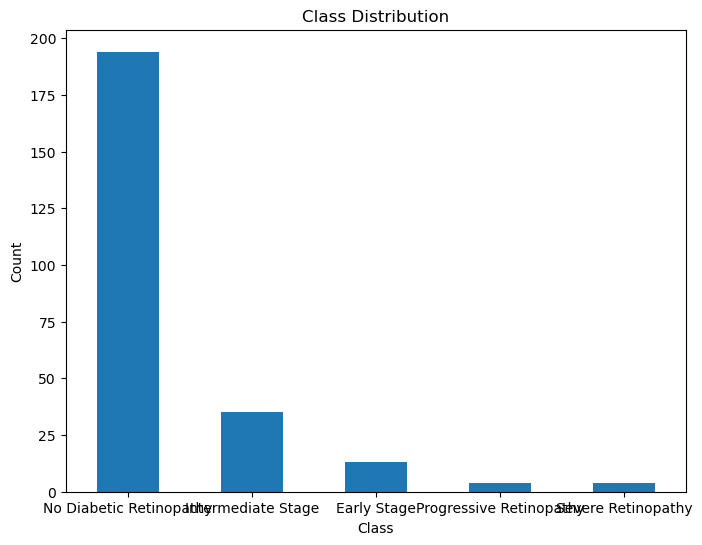

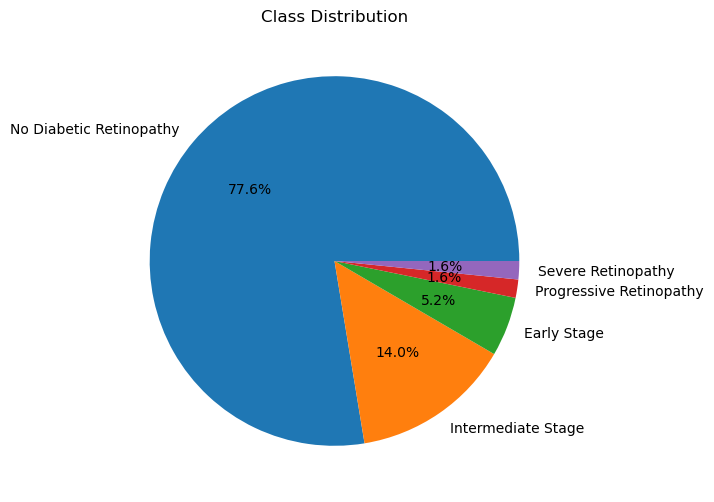

In [24]:
#EDA - Labels distribution

# Count the instances for each class
class_counts = Labels_Data['level'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


In [25]:
# Convert the list of images to a numpy array
X = np.array(selected_images)

# Extract the labels
y = Labels_Data['level'].values

print('This step to create Arrays is completed')

This step to create Arrays is completed


In [26]:
del selected_images

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [28]:
del X

In [29]:
# Flatten the image data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize the features
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
print(X_train.shape)
print(X_test.shape)

(200, 3145728)
(50, 3145728)


/Users/sachin/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Optimized Hyperparameters:
n_neighbors: 3
weights: uniform
Accuracy: 0.775


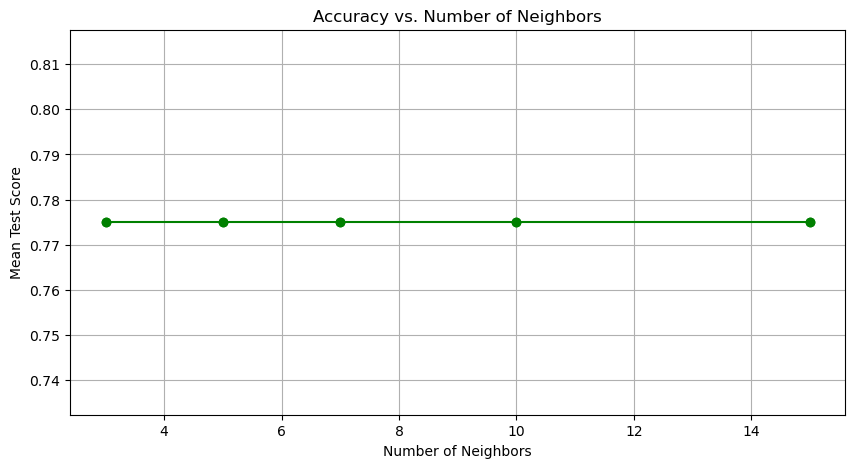

In [32]:
# Define the parameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance']
}

# Create the KNN model
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the results
results = grid_search.cv_results_
neighbors = results['param_n_neighbors']
mean_scores = results['mean_test_score']

# Print the optimized hyperparameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Optimized Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print("Accuracy:", best_accuracy)

# Plot accuracy vs. number of neighbors
plt.figure(figsize=(10, 5))
valid_scores = mean_scores[~np.isnan(mean_scores)]
valid_neighbors = neighbors[~np.isnan(mean_scores)]
plt.plot(valid_neighbors, valid_scores, 'go-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()


In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model with the best hyperparameters
best_n_neighbors = 5
best_weights = 'uniform'
knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.76


In [14]:
# 1) Print Prediction Results vs Test Labels
print("Prediction Results vs Test Labels:")
for pred, true_label in zip(y_pred, y_test):
    if pred != true_label:
        print(f"\033[91mPredicted: {pred}, True Label: {true_label} <-- Mismatch\033[0m")
    else:
        print(f"Predicted: {pred}, True Label: {true_label}")


Prediction Results vs Test Labels:
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicted: No Diabetic Retinopathy, True Label: Progressive Retinopathy <-- Mismatch
Predicted: No Diabetic Retinopathy, True Label: Intermediate Stage <-- Mismatch
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicted: No Diabetic Retinopathy, True Label: No Diabetic Retinopathy
Predicte

In [15]:
# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
                         precision    recall  f1-score   support

            Early Stage       0.00      0.00      0.00         1
     Intermediate Stage       0.00      0.00      0.00         8
No Diabetic Retinopathy       0.79      0.97      0.87        39
Progressive Retinopathy       0.00      0.00      0.00         1
     Severe Retinopathy       0.00      0.00      0.00         1

               accuracy                           0.76        50
              macro avg       0.16      0.19      0.17        50
           weighted avg       0.62      0.76      0.68        50



/Users/sachin/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sachin/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sachin/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique labels from y_test and D_pred
labels = sorted(set(y_test).union(set(y_pred)))

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Print the confusion matrix in a table format
print("Confusion Matrix:")
print(df_cm.to_string())

Confusion Matrix:
                         Early Stage  Intermediate Stage  No Diabetic Retinopathy  Progressive Retinopathy  Severe Retinopathy
Early Stage                        0                   0                        1                        0                   0
Intermediate Stage                 0                   0                        8                        0                   0
No Diabetic Retinopathy            0                   1                       38                        0                   0
Progressive Retinopathy            0                   0                        1                        0                   0
Severe Retinopathy                 1                   0                        0                        0                   0
